In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

tsla = yf.download('TSLA', start='2015-01-01', end='2024-10-31')
bnd = yf.download('BND', start='2015-01-01', end='2024-10-31')
spy = yf.download('SPY', start='2015-01-01', end='2024-10-31')

all_data = {
    'tesla':tsla,
    'bond':bnd,
    'spy':spy
}

# tickers = ["TSLA", "BND", "SPY"]
# data = yf.download(tickers, start="2015-01-01", end="2024-10-31")
# data_adj_close = data['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [52]:
for keys,data in all_data.items():
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')

In [53]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [54]:
for items,keys in all_data.items():
    print(f'{items} missing values\n{keys.isna().sum()}\n')

tesla missing values
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

bond missing values
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64

spy missing values
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64



In [55]:
for items,keys in all_data.items():
    print(keys.dtypes)

Price      Ticker
Adj Close  TSLA      float64
Close      TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Open       TSLA      float64
Volume     TSLA        int64
dtype: object
Price      Ticker
Adj Close  BND       float64
Close      BND       float64
High       BND       float64
Low        BND       float64
Open       BND       float64
Volume     BND         int64
dtype: object
Price      Ticker
Adj Close  SPY       float64
Close      SPY       float64
High       SPY       float64
Low        SPY       float64
Open       SPY       float64
Volume     SPY         int64
dtype: object


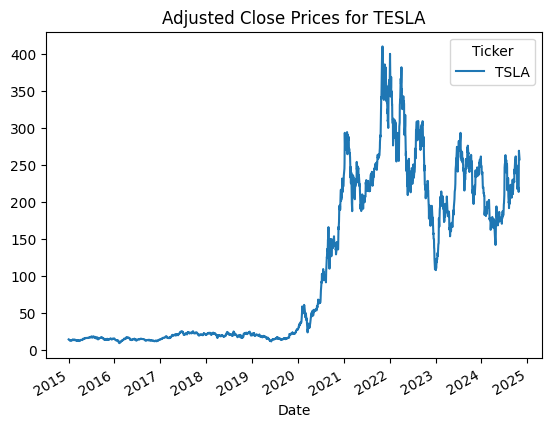

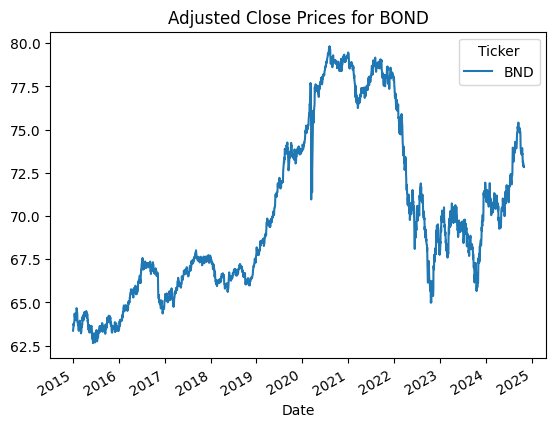

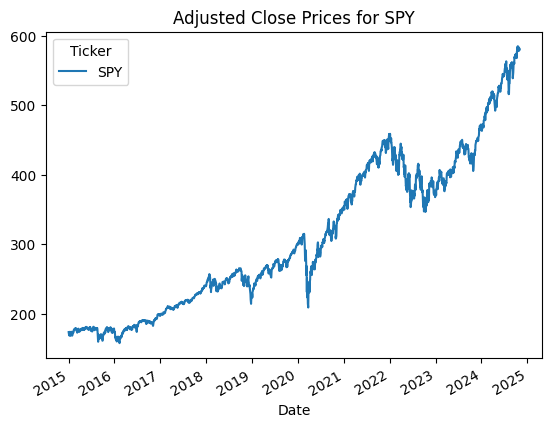

In [56]:
# Plot Adjusted Close Prices for all assets
for asset, data in all_data.items():
    data['Adj Close'].plot(title=f"Adjusted Close Prices for {asset.upper()}")
    plt.show()

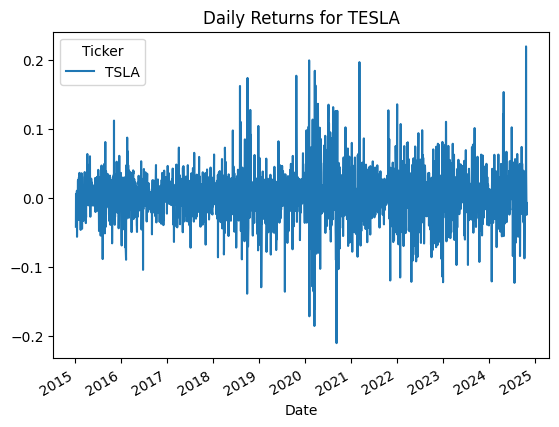

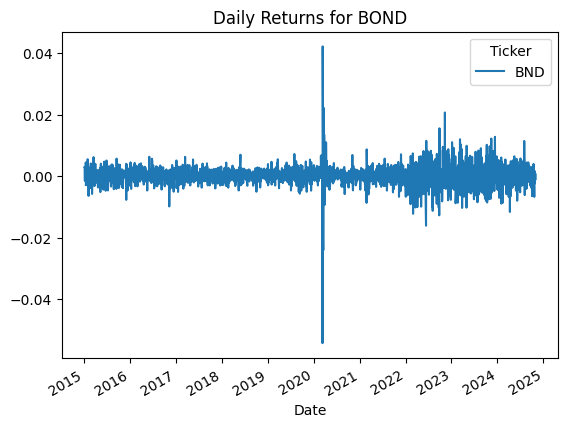

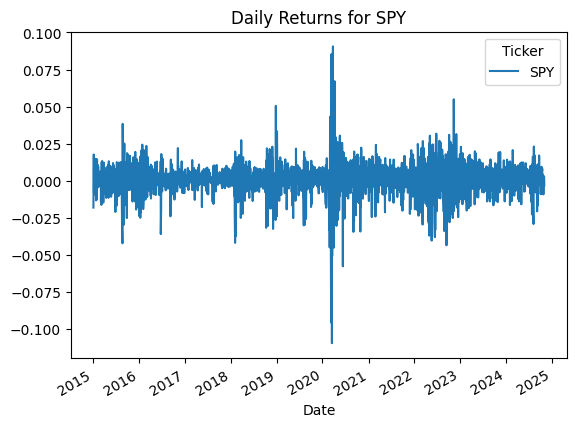

In [57]:
# Plot Daily Returns for all assets
for asset, data in all_data.items():
    returns = data['Adj Close'].pct_change().dropna()
    returns.plot(title=f"Daily Returns for {asset.upper()}")
    plt.show()

>> ## Volatility with shaded volatility range

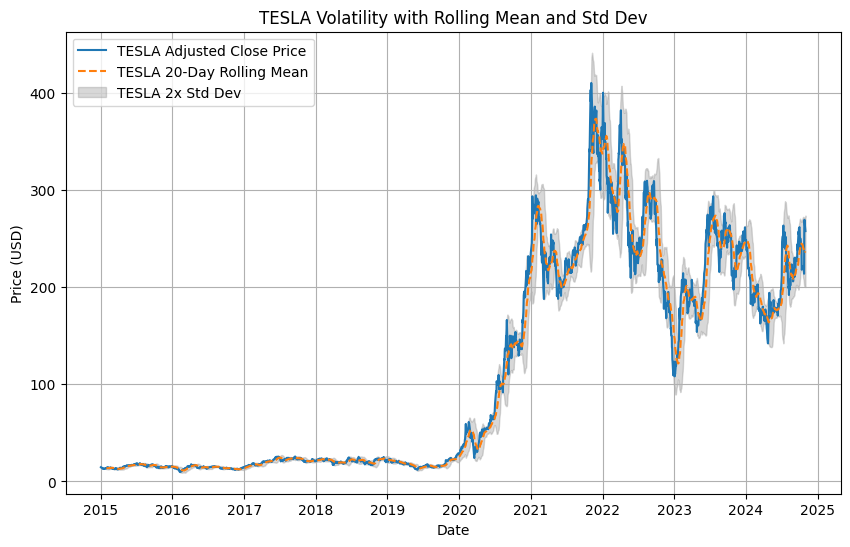

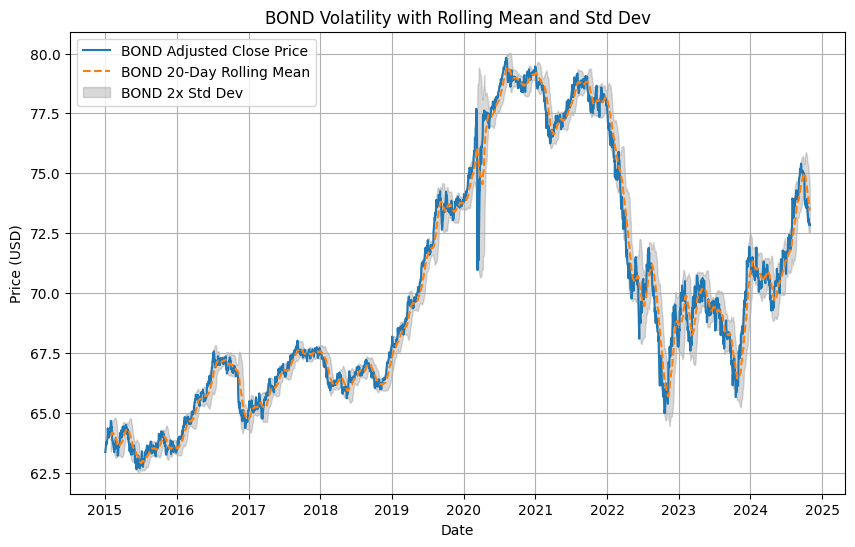

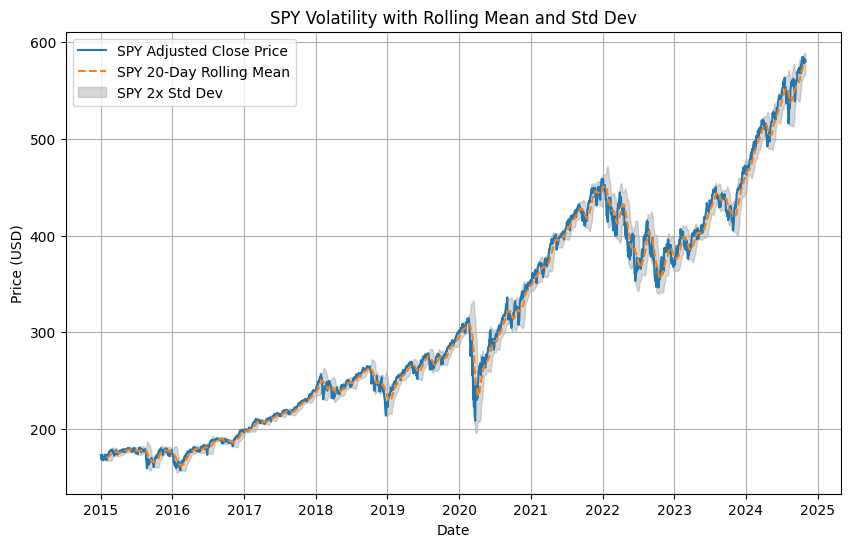

In [58]:
rolling_window = 20  # 20-day rolling window

for asset, data in all_data.items():
    # Calculate rolling mean and standard deviation
    data['Rolling Mean'] = data['Adj Close'].rolling(window=rolling_window).mean()
    data['Rolling Std Dev'] = data['Adj Close'].rolling(window=rolling_window).std()

    # Plot Adjusted Close Price with rolling mean and standard deviation
    plt.figure(figsize=(10, 6))
    plt.plot(data['Adj Close'], label=f'{asset.upper()} Adjusted Close Price')
    plt.plot(data['Rolling Mean'], label=f'{asset.upper()} {rolling_window}-Day Rolling Mean', linestyle='--')
    plt.fill_between(data.index, 
                     data['Rolling Mean'] - 2 * data['Rolling Std Dev'], 
                     data['Rolling Mean'] + 2 * data['Rolling Std Dev'], 
                     color='gray', alpha=0.3, label=f'{asset.upper()} 2x Std Dev')
    plt.title(f'{asset.upper()} Volatility with Rolling Mean and Std Dev')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


>> ## Outliers

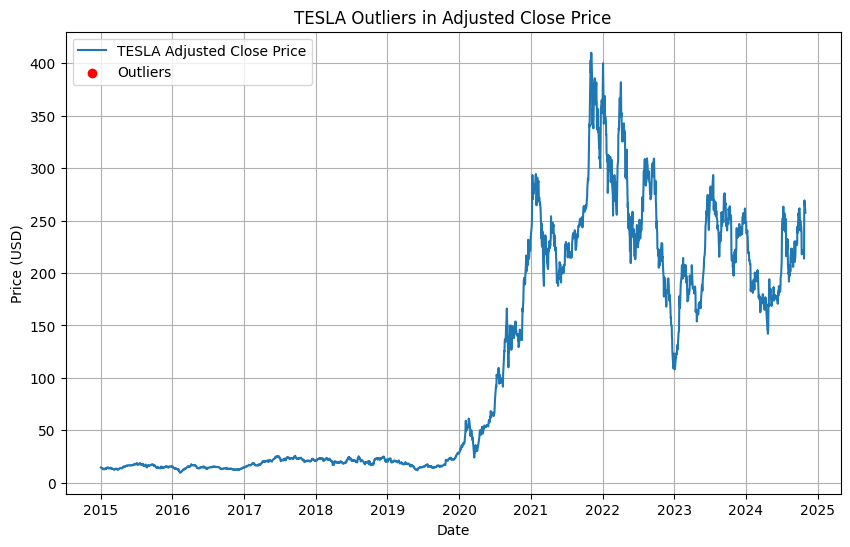

Outliers for TESLA:
Empty DataFrame
Columns: [(Adj Close, TSLA), (Z-Score, )]
Index: []




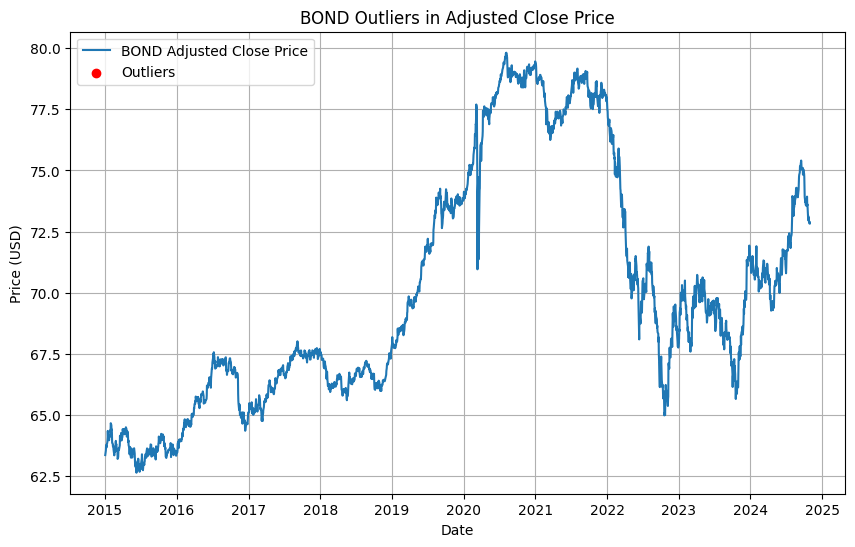

Outliers for BOND:
Empty DataFrame
Columns: [(Adj Close, BND), (Z-Score, )]
Index: []




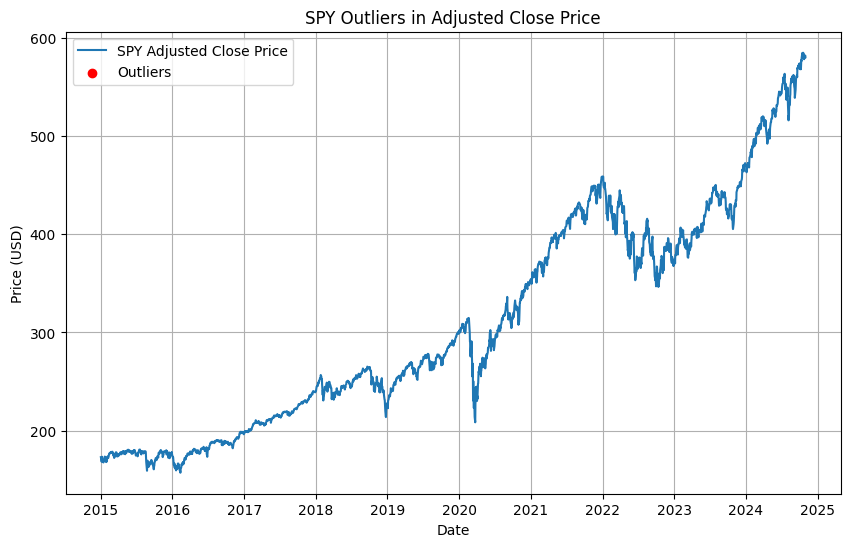

Outliers for SPY:
Empty DataFrame
Columns: [(Adj Close, SPY), (Z-Score, )]
Index: []




In [59]:
from scipy.stats import zscore

# Detect outliers using Z-score
for asset, data in all_data.items():
    data['Z-Score'] = zscore(data['Adj Close'])
    
    # Define outliers as values with Z-score > 3 or < -3
    outliers = data[data['Z-Score'].abs() > 3]
    
    # Plot Adjusted Close Price with outliers
    plt.figure(figsize=(10, 6))
    plt.plot(data['Adj Close'], label=f'{asset.upper()} Adjusted Close Price')
    plt.scatter(outliers.index, outliers['Adj Close'], color='red', label='Outliers', zorder=5)
    plt.title(f'{asset.upper()} Outliers in Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print outliers' dates and values
    print(f"Outliers for {asset.upper()}:")
    print(outliers[['Adj Close', 'Z-Score']])
    print("\n")


>> ## Unusual High and Low Returns

>>> ### Calculate Daily returns

In [60]:
for asset, data in all_data.items():
    data['Daily Return'] = data['Adj Close'].pct_change() * 100 
    data.dropna(inplace=True)

>>> ### Daily Percentage Change

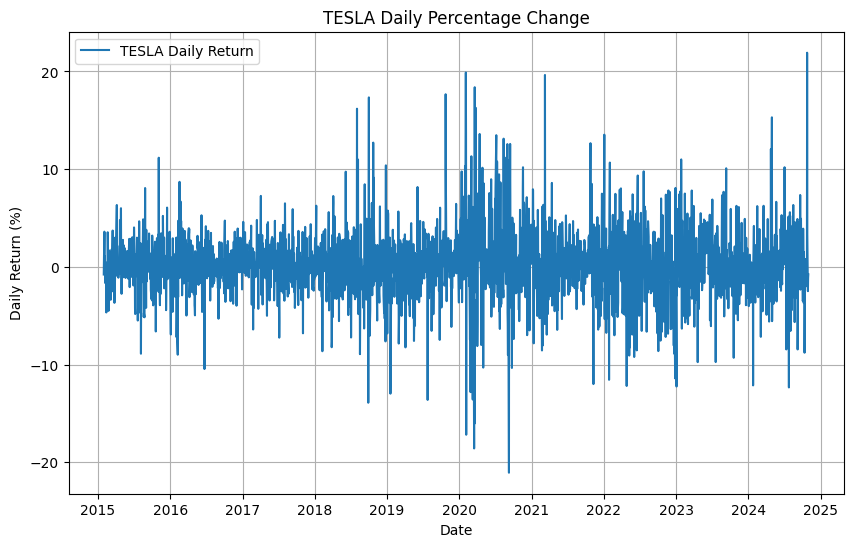

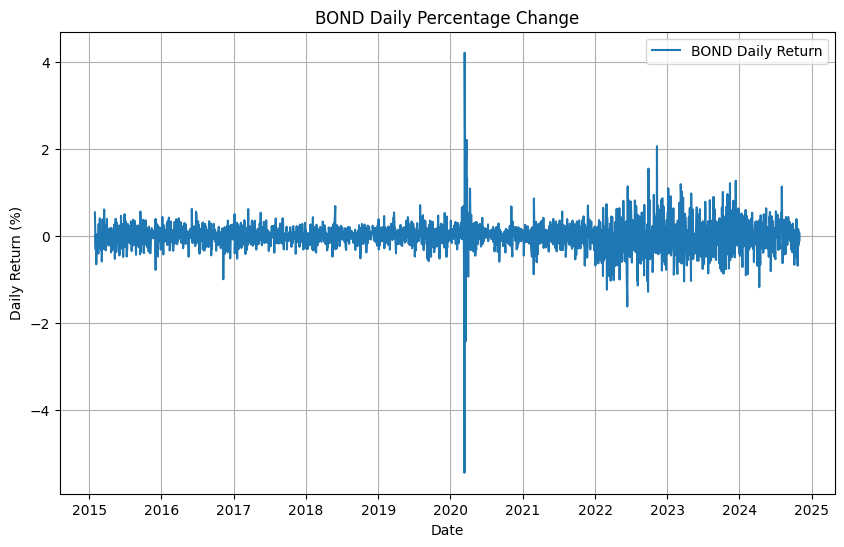

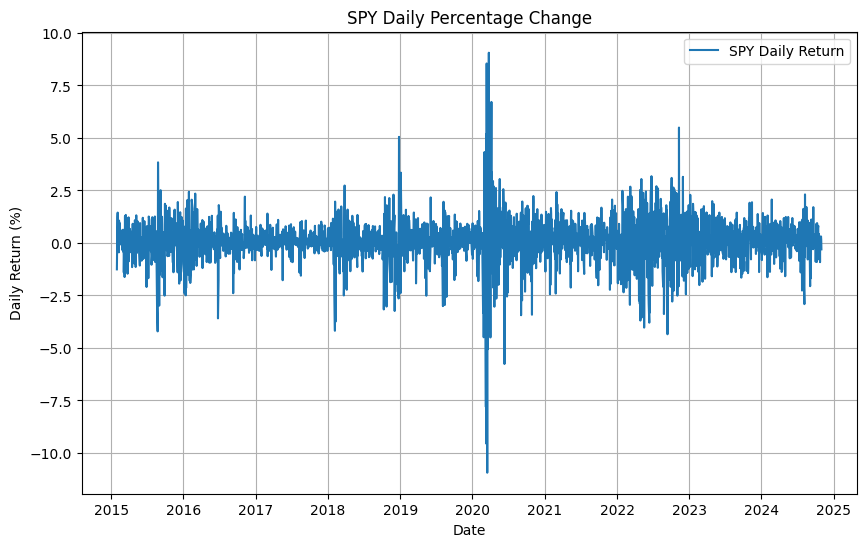

In [61]:
for asset, data in all_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(data['Daily Return'], label=f'{asset.upper()} Daily Return')
    plt.title(f'{asset.upper()} Daily Percentage Change')
    plt.xlabel('Date')
    plt.ylabel('Daily Return (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

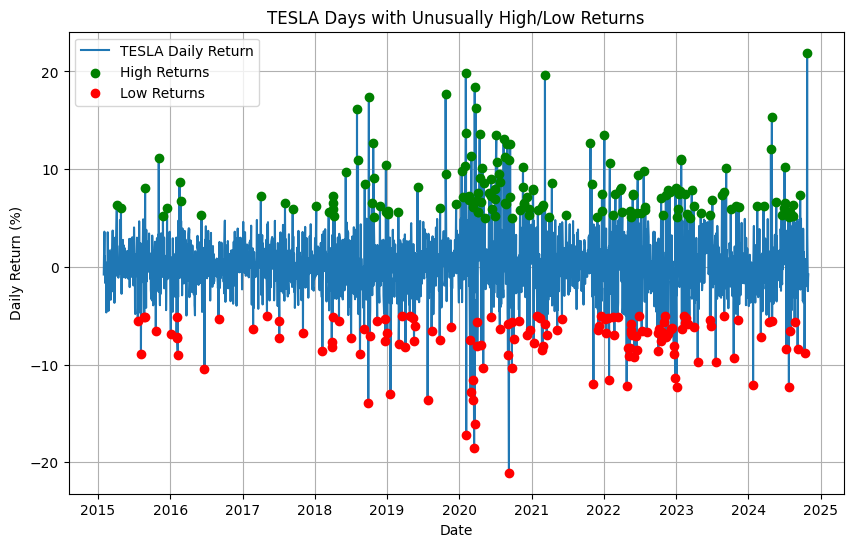

High Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-04-06 00:00:00+00:00     6.335084
2015-04-27 00:00:00+00:00     6.006504
2015-08-27 00:00:00+00:00     8.072407
2015-11-04 00:00:00+00:00    11.173506
2015-11-25 00:00:00+00:00     5.218781
...                                ...
2024-07-29 00:00:00+00:00     5.595998
2024-08-13 00:00:00+00:00     5.235706
2024-08-15 00:00:00+00:00     6.336277
2024-09-19 00:00:00+00:00     7.359156
2024-10-24 00:00:00+00:00    21.919035

[159 rows x 1 columns]


Low Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-07-21 00:00:00+00:00    -5.487851
2015-08-06 00:00:00+00:00    -8.884613
2015-08-20 00:00:00+00:00    -5.120475
2015-08-24 00:00:00+00:00    -5.156654
2015-10-20 00:00:00+00:00    -6.606755
...                                ...
2024-07-24 00:00:00+00:00   -1

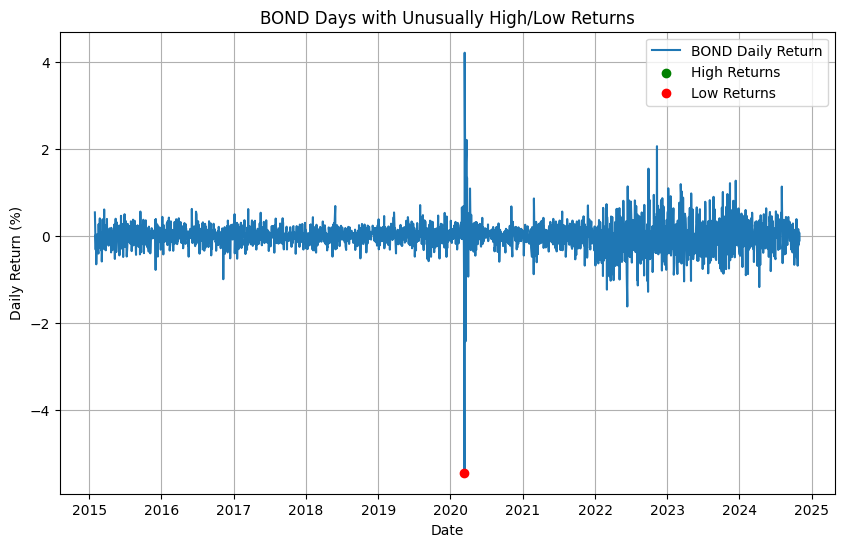

High Returns for BOND:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


Low Returns for BOND:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-12 00:00:00+00:00    -5.438449




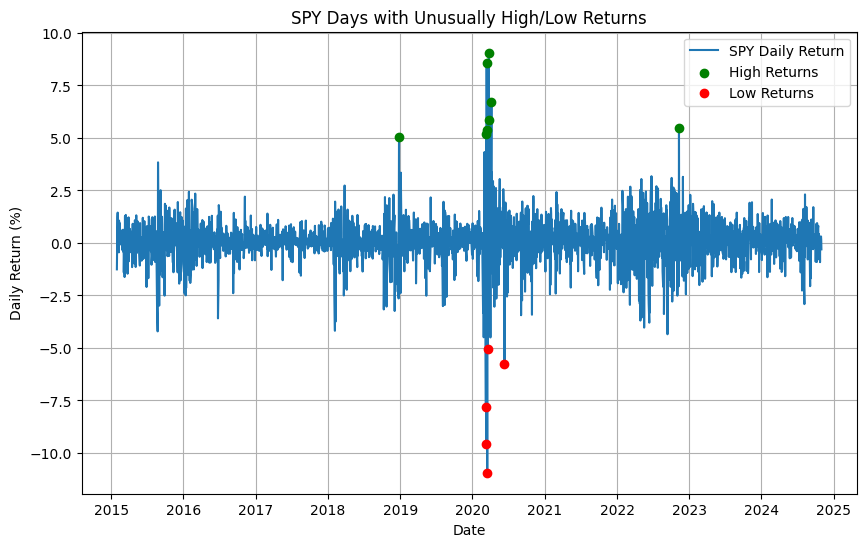

High Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2018-12-26 00:00:00+00:00     5.052483
2020-03-10 00:00:00+00:00     5.174460
2020-03-13 00:00:00+00:00     8.548643
2020-03-17 00:00:00+00:00     5.399232
2020-03-24 00:00:00+00:00     9.060329
2020-03-26 00:00:00+00:00     5.838961
2020-04-06 00:00:00+00:00     6.716585
2022-11-10 00:00:00+00:00     5.495422


Low Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-09 00:00:00+00:00    -7.809411
2020-03-12 00:00:00+00:00    -9.567700
2020-03-16 00:00:00+00:00   -10.942398
2020-03-18 00:00:00+00:00    -5.063284
2020-06-11 00:00:00+00:00    -5.764909




In [62]:
threshold = 5  # 5% threshold for high/low returns

for asset, data in all_data.items():
    high_returns = data[data['Daily Return'] > threshold]
    low_returns = data[data['Daily Return'] < -threshold]

    # Plot high and low returns
    plt.figure(figsize=(10, 6))
    plt.plot(data['Daily Return'], label=f'{asset.upper()} Daily Return')
    plt.scatter(high_returns.index, high_returns['Daily Return'], color='green', label='High Returns', zorder=5)
    plt.scatter(low_returns.index, low_returns['Daily Return'], color='red', label='Low Returns', zorder=5)
    plt.title(f'{asset.upper()} Days with Unusually High/Low Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"High Returns for {asset.upper()}:")
    print(high_returns[['Daily Return']])
    print("\n")
    
    print(f"Low Returns for {asset.upper()}:")
    print(low_returns[['Daily Return']])
    print("\n")


>> ## Seasonality and Trends

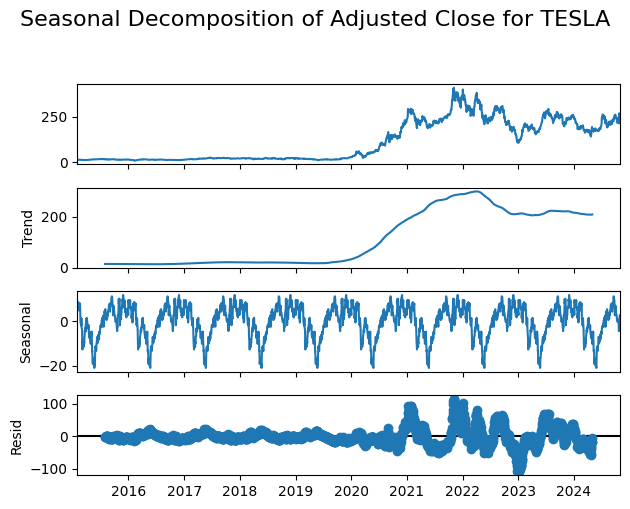

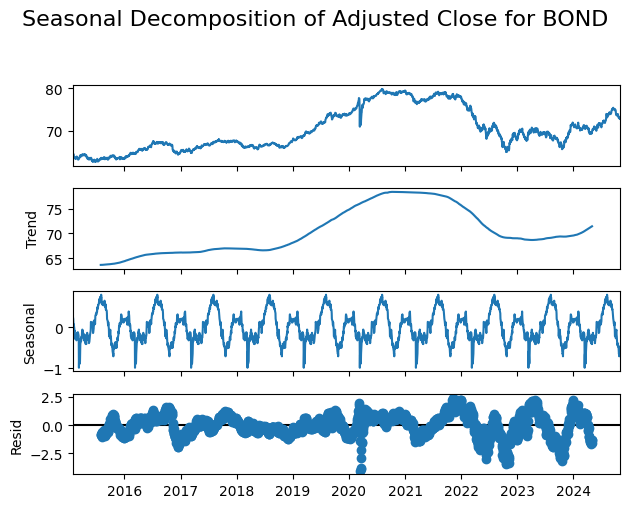

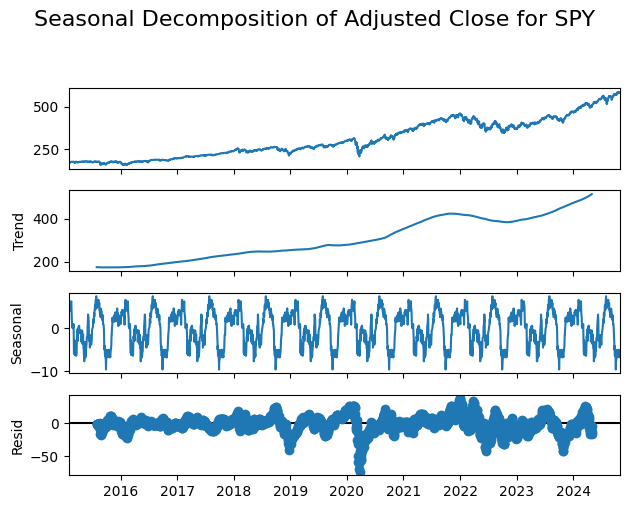

In [63]:
for asset, data in all_data.items():
    decomposition = seasonal_decompose(data['Adj Close'], model='additive', period=252)
    
    fig = decomposition.plot()
    
    fig.suptitle(f"Seasonal Decomposition of Adjusted Close for {asset.upper()}", fontsize=16, y=1.05)
    
    plt.tight_layout()
    
    plt.show()

>> ## Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

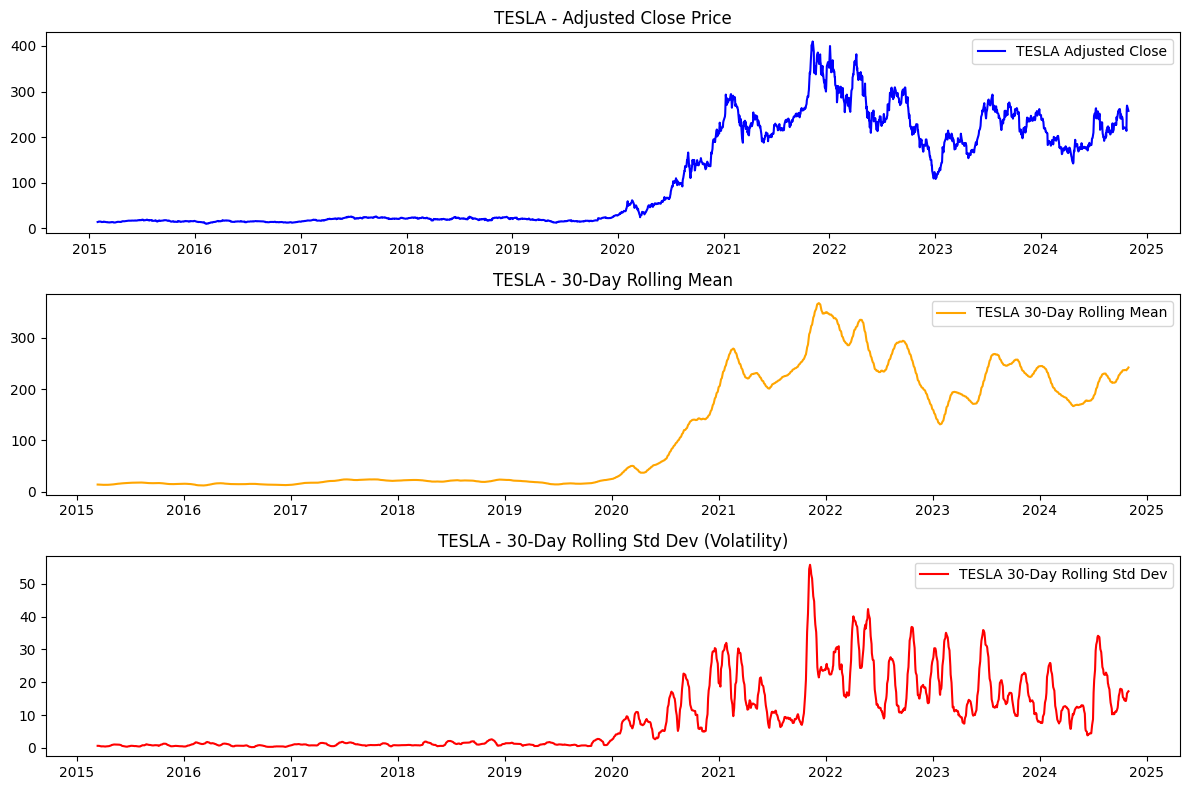

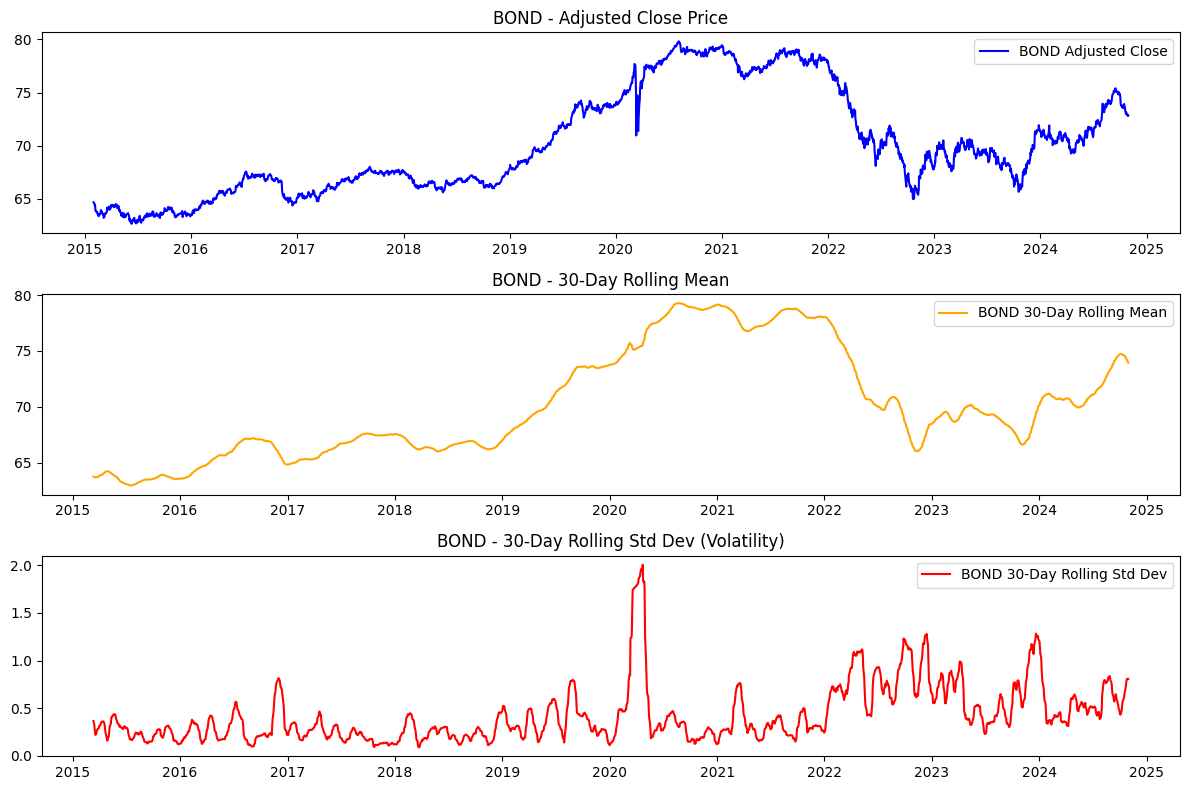

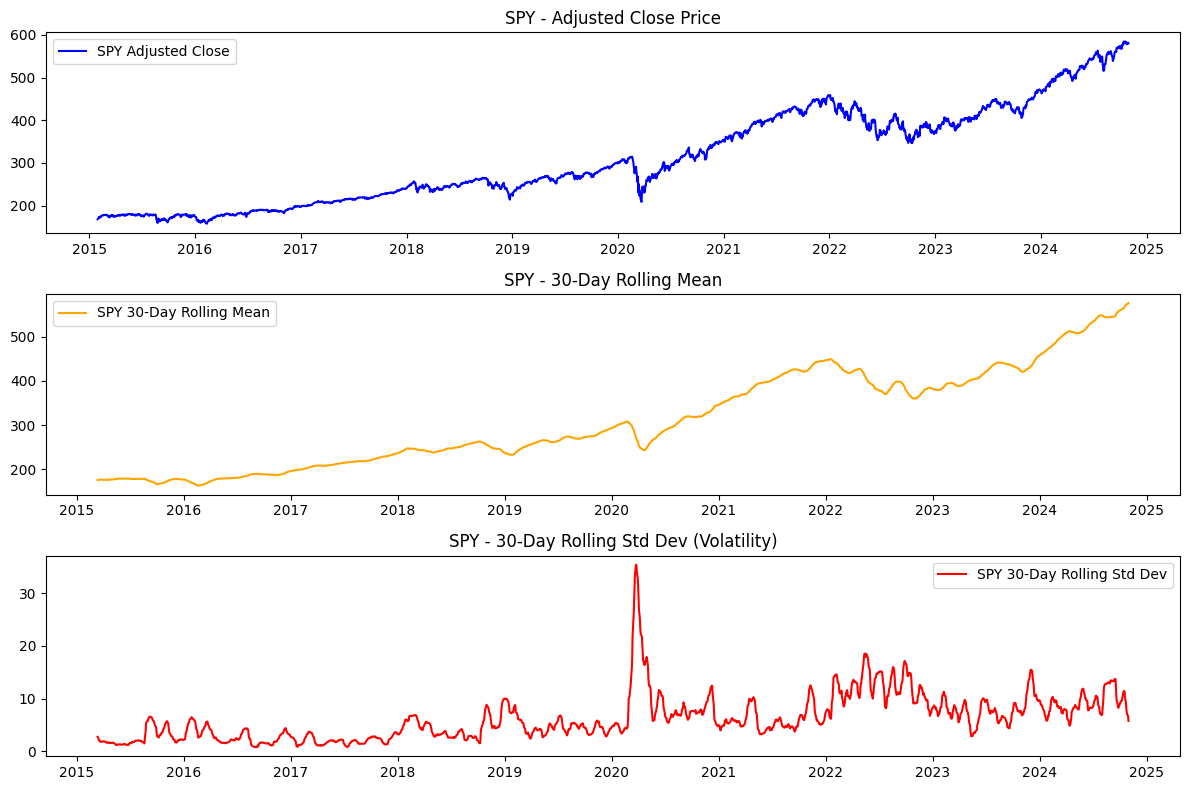

In [64]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

# Analyze volatility for each asset
for asset, data in all_data.items():
    # Calculate the rolling mean and standard deviation for the adjusted close price
    rolling_mean = data['Adj Close'].rolling(window=window_size).mean()
    rolling_std = data['Adj Close'].rolling(window=window_size).std()

    # Plot the adjusted close price along with rolling mean and rolling standard deviation
    plt.figure(figsize=(12, 8))

    # Plot the adjusted close price
    plt.subplot(311)
    plt.plot(data['Adj Close'], label=f'{asset.upper()} Adjusted Close', color='blue')
    plt.title(f'{asset.upper()} - Adjusted Close Price')
    plt.legend()

    # Plot the rolling mean
    plt.subplot(312)
    plt.plot(rolling_mean, label=f'{asset.upper()} {window_size}-Day Rolling Mean', color='orange')
    plt.title(f'{asset.upper()} - {window_size}-Day Rolling Mean')
    plt.legend()

    # Plot the rolling standard deviation
    plt.subplot(313)
    plt.plot(rolling_std, label=f'{asset.upper()} {window_size}-Day Rolling Std Dev', color='red')
    plt.title(f'{asset.upper()} - {window_size}-Day Rolling Std Dev (Volatility)')
    plt.legend()

    plt.tight_layout()
    plt.show()


>> ## Value At Risk

tesla - 5% Value at Risk (95% confidence): -5.1251
bond - 5% Value at Risk (95% confidence): -0.4801
spy - 5% Value at Risk (95% confidence): -1.6762


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

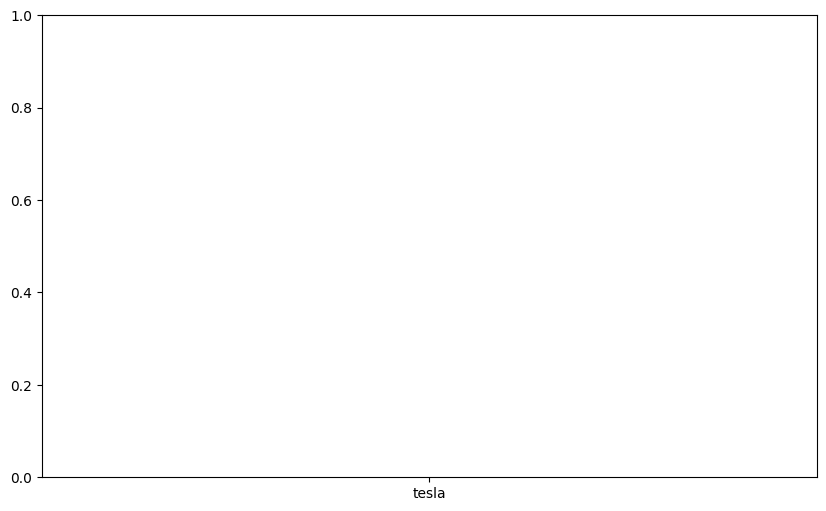

In [ ]:
def VAR(asset,data):
    VaR_95 = data['Daily Return'].quantile(0.05)  # 5th percentile for 95% confidence
    print(f"{asset} - 5% Value at Risk (95% confidence): {VaR_95:.4f}")
VaR_values = {}
for asset, data in all_data.items():
    VaR_value = VAR(asset, data)
    if VaR_value is not None:
        VaR_values[asset] = VaR_value
plt.figure(figsize=(10, 6))
plt.bar(VaR_values.keys(), VaR_values.values(), color='orange')
plt.title('5% Value at Risk (VaR) for Different Assets')
plt.xlabel('Assets')
plt.ylabel('Value at Risk (VaR)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # line at zero for reference
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>> ## Sharpe Ratio

In [66]:
def Sharpe(asset,data):
    risk_free_rate = 0.02  # 2% annual risk-free rate
    excess_return = data['Daily Return'].mean() - risk_free_rate / 252  # Daily excess return
    sharpe_ratio = excess_return / data['Daily Return'].std()  # Daily Sharpe Ratio
    print(f"{asset} Sharpe Ratio: {sharpe_ratio:.4f}")
for asset, data in all_data.items():
    Sharpe(asset, data)

tesla Sharpe Ratio: 0.0512
bond Sharpe Ratio: 0.0162
spy Sharpe Ratio: 0.0504
